In [5]:
import pandas as pd
import numpy as np
# Assuming you have a DataFrame named 'd' or modify this line to load your data
df = pd.read_csv('Assets/prefinal_dataset.csv')
df.head()


In [6]:
df.head()

,SUBJECT_ID,SESSION_ID,TRIAL_ID,COP_AP_PRO_1,COP_AP_PRO_2,COP_AP_PRO_3,COP_AP_PRO_4,COP_AP_PRO_5,COP_AP_PRO_6,COP_AP_PRO_7,...,F_V_PRO_93.1,F_V_PRO_94.1,F_V_PRO_95.1,F_V_PRO_96.1,F_V_PRO_97.1,F_V_PRO_98.1,F_V_PRO_99.1,F_V_PRO_100.1,F_V_PRO_101.1,CLASS_LABEL
0,510,413,1,0,0.0,0.001679,0.005040,0.009565,0.014452,0.019158,...,0.282119,0.233682,0.189883,0.151416,0.117502,0.087352,0.061159,0.039500,0.022633,C
1,510,413,2,0,-0.0,0.001762,0.006239,0.012014,0.017909,0.023363,...,0.271192,0.225628,0.184277,0.147850,0.115619,0.086782,0.061318,0.039709,0.022630,C
2,510,413,3,0,0.0,-0.000709,0.000988,0.004852,0.009656,0.014573,...,0.285054,0.235092,0.189484,0.149884,0.115968,0.086485,0.060872,0.039427,0.022631,C
3,510,413,4,0,-0.0,0.006717,0.013107,0.018519,0.023304,0.027571,...,0.251956,0.202682,0.159656,0.124149,0.095263,0.071202,0.051078,0.034963,0.022631,C
4,510,413,6,0,-0.0,0.000983,0.004263,0.008647,0.013425,0.018278,...,0.256634,0.212920,0.174113,0.139937,0.109247,0.081570,0.057560,0.037933,0.022633,C


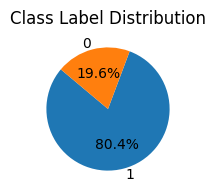

In [7]:
label_map = {'HC': 0, 'A': 1, 'H': 1, 'C': 1, 'K': 1}

# Map the values in the CLASS_LABEL column using label_map
df['CLASS_LABEL'] = df['CLASS_LABEL'].map(label_map)
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each class label
class_counts = df['CLASS_LABEL'].value_counts()

# Create a pie chart
plt.figure(figsize=(2,2))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Label Distribution')

# Display the pie chart
plt.show()



In [9]:
import pandas as pd
import numpy as np
# Assuming you have a DataFrame named 'd' or modify this line to load your data
df = pd.read_csv('Assets/final_dataset.csv')



In [16]:
# Assuming df is your DataFrame
X = df[['COP_AP_PRO_2', 'COP_AP_PRO_3', 'COP_AP_PRO_2.1', 'COP_AP_PRO_3.1', 'COP_ML_PRO_1', 'COP_ML_PRO_1.1', 
'F_AP_PRO_1', 'F_AP_PRO_2', 'F_AP_PRO_3', 'F_AP_PRO_1.1', 'F_AP_PRO_2.1', 'F_AP_PRO_3.1', 'F_ML_PRO_1',
'F_ML_PRO_2', 'F_ML_PRO_8', 'F_ML_PRO_9', 'F_ML_PRO_1.1', 'F_ML_PRO_2.1', 'F_ML_PRO_8.1', 'F_ML_PRO_9.1', 
'F_V_PRO_1', 'F_V_PRO_2', 'F_V_PRO_2.1']]
y = df['CLASS_LABEL']
X.shape

(135954, 23)

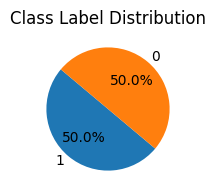

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each class label
class_counts = df['CLASS_LABEL'].value_counts()

# Create a pie chart
plt.figure(figsize=(2,2))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Label Distribution')

# Display the pie chart
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Standard Scaling to the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM CLASSIFIER

In [5]:
# Import necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear'], 'gamma': ['auto']}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters: ", best_params)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


Best parameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy on test set: 78.65%


In [5]:
# Import necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {'C': [1000,100], 'kernel': ['linear'], 'gamma': ['auto','scaler']}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters: ", best_params)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

Best parameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy on test set: 78.65%


# Logistic Regression

In [6]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Define the Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters: ", best_params)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Best parameters:  {'C': 1000, 'penalty': 'l2'}
Accuracy on test set: 78.37%


C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest 

In [6]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Best parameters: ", best_params)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))


KeyboardInterrupt: 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=20, random_state=42)

# Assuming you have already defined and split your features and target variables (X_train, X_test, y_train, y_test)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set: {:.2f}%".format(accuracy * 100))



Accuracy on test set: 97.65%


100 estimator = 98.37%
200 estimator = 98.44%

# Naive Bayes

In [ ]:
# Bernoulli -> 67.53%
# Gaussian -> 76.18%
# Multinomial -> doesnot work on negative value

# XG Boost

In [ ]:
92.20

# Ada Boost

79.70

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,  # Split a portion of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               6656      
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 171009 (668.00 KB)
Trainable params: 171009 (668.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 10s 4ms/step - loss: 0.6876 - accuracy: 0.6161 - val_loss: 0.6825 - val_accuracy: 0.7061


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,  # Split a portion of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               6656      
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 171009 (668.00 KB)
Trainable params: 171009 (668.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 17s 7ms/step - loss: 0.4683 - accuracy: 0.7819 - val_loss: 0.4548 - val_accuracy: 0.7882


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512))
model.add(layers.PReLU())  # Use PReLU directly, no need to define it separately
model.add(layers.Dense(256))
model.add(layers.PReLU())
model.add(layers.Dense(128))
model.add(layers.PReLU())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               6656      
                                                                 
 p_re_lu_1 (PReLU)           (None, 512)               512       
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 p_re_lu_2 (PReLU)           (None, 256)               256       
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 p_re_lu_3 (PReLU)           (None, 128)               128       
                                                                 
 dense_17 (Dense)            (None, 1)                

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(23,)))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               12288     
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 176641 (690.00 KB)
Trainable params: 176641 (690.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 18s 7ms/step - loss: 0.4513 - accuracy: 0.7914 - val_loss: 0.4488 - val_accuracy: 0.7872


In [14]:
model.save('model')
import joblib
# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


['scaler.pkl']

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

# Create an instance of the SGD optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # You can adjust the learning rate

# Compile the model with SGD optimizer
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               6656      
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 171009 (668.00 KB)
Trainable params: 171009 (668.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 11s 4ms/step - loss: 0.6795 - accuracy: 0.6596 - val_loss: 0.6605 - val_accuracy: 0.6858


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512, activation='elu'))
model.add(layers.Dense(256, activation='elu'))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 512)               6656      
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 171009 (668.00 KB)
Trainable params: 171009 (668.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 12s 5ms/step - loss: 0.4799 - accuracy: 0.7769 - val_loss: 0.4727 - val_accuracy: 0.7797


In [ ]:
model.save('model')
import joblib
# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming X_train is your training data with shape (num_samples, 12)
# and y_train is your corresponding target variable

# Reshape data for RNN (assuming a sequence length of 12)
sequence_length = 12
X_train_reshaped = tf.reshape(X_train, (-1, sequence_length, 1))

# Define the RNN model
model = models.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(sequence_length, 1), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train_reshaped, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1
)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 10s 4ms/step - loss: 0.5558 - accuracy: 0.7300 - val_loss: 0.4753 - val_accuracy: 0.7829
Epoch 2/100
2380/2380 [==============================] - 9s 4ms/step - loss: 0.4633 - accuracy: 0.7834 - val_loss: 0.4555 - val_accuracy: 0.7907
Epoch 3/100
2380/2380 [==============================] - 9s 4ms/step - loss: 0.4502 - accuracy: 0.7901 - val_loss: 0.4487 - 

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Assuming X and y are your features and target variable
# Replace this with your actual data
# X, y = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Min-Max Scaling to the feature variables
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test for RNN input (assuming 1D time series)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Initialize RNN:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
history = regressor.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100
2974/2974 [==============================] - 38s 12ms/step - loss: 0.2070 - accuracy: 0.7213 - val_loss: 0.1509 - val_accuracy: 0.7825
Epoch 2/100
2974/2974 [==============================] - 37s 12ms/step - loss: 0.1536 - accuracy: 0.7825 - val_loss: 0.1445 - val_accuracy: 0.7914
Epoch 3/100
2974/2974 [==============================] - 38s 13ms/step - loss: 0.1475 - accuracy: 0.7916 - val_loss: 0.1487 - val_accuracy: 0.7870
Epoch 4/100
2974/2974 [==============================] - 36s 12ms/step - loss: 0.1447 - accuracy: 0.7934 - val_loss: 0.1354 - val_accuracy: 0.8065
Epoch 5/100
2974/2974 [==============================] - 36s 12ms/step - loss: 0.1423 - accuracy: 0.7971 - val_loss: 0.1346 - val_accuracy: 0.8067
Epoch 6/100
2974/2974 [==============================] - 37s 12ms/step - loss: 0.1417 - accuracy: 0.7990 - val_loss: 0.1349 - val_accuracy: 0.8075
Epoch 7/100
2974/2974 [==============================] - 36s 12ms/step - loss: 0.1411 - accuracy: 0.8005 - val_loss: 0

KeyboardInterrupt: 

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the Swish activation function
def swish_activation(x):
    return x * tf.math.sigmoid(x)

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512, activation=swish_activation))
model.add(layers.Dense(256, activation=swish_activation))
model.add(layers.Dense(128, activation=swish_activation))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6656      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 171009 (668.00 KB)
Trainable params: 171009 (668.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 17s 7ms/step - loss: 0.4815 - accuracy: 0.7764 - val_loss: 0.4715 - val_accuracy: 0.7813
Ep

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with Adadelta optimizer
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               6656      
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 171009 (668.00 KB)
Trainable params: 171009 (668.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 17s 7ms/step - loss: 0.6941 - accuracy: 0.4821 - val_loss: 0.6930 - val_accuracy: 0.5313


KeyboardInterrupt: 

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with Adadelta optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               3328      
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 44545 (174.00 KB)
Trainable params: 44545 (174.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 12s 5ms/step - loss: 0.4834 - accuracy: 0.7765 - val_loss: 0.4809 - val_accuracy: 0.7803
Ep

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with Adadelta optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               3328      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36353 (142.00 KB)
Trainable params: 36353 (142.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 13s 5ms/step - loss: 0.4755 - accuracy: 0.7790 - val_loss: 0.4613 - val_accuracy: 0.7837
Epoch 2/100
2380/2380 [==============================] - 12s 5ms/step - loss: 0.4595 - accuracy: 0.7874 - val_loss: 0.4741 - val_accur

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))
model.add(layers.Dense(512, activation='tanh'))
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with Adadelta optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6656      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 179201 (700.00 KB)
Trainable params: 179201 (700.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380

KeyboardInterrupt: 

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(12,)))

model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with Adadelta optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
batch_size = 32
epochs = 100
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3328      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44545 (174.00 KB)
Trainable params: 44545 (174.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2380/2380 [==============================] - 12s 4ms/step - loss: 0.6310 - accuracy: 0.6066 - val_loss: 0.4871 - val_accuracy: 0.7730
Ep

KeyboardInterrupt: 